In [45]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_train = pd.read_csv('data\\train.csv')
# df_train.to_parquet('train.parquet')
# df_train = pd.read_parquet('train.parquet')
df_ts = df_train.iloc[:,5:] # timeseries features only
df_train['y_s'] = df_train.y > 1 # simplified y: label 0 for 1 and 1 for 2,3 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
df_train[df_train.y == 2]

,id,main.pos,fun.pos,when,y,E1A1,E1A2,E1A3,E1A4,E1A5,...,M2V2040,M2V2041,M2V2042,M2V2043,M2V2044,M2V2045,M2V2046,M2V2047,M2V2048,y_s
45,71,LHCB-6,QSCB-6-CP2,2018-05,2,-0.019961,0.360694,0.793256,1.017966,-0.108301,...,0.069634,-0.065539,-0.162668,-0.010467,-0.076620,-0.157719,0.049147,-0.012327,-0.025316,True
52,82,LHCB-6,QSCB-6-CP2,2018-12,2,0.074291,0.071821,0.137672,-0.192335,0.159581,...,0.060101,0.012269,-0.018523,-0.034849,-0.071711,0.017933,0.024581,0.068732,0.064189,True
71,108,LHCB-4,QSCB-4-CP2,2020-09,2,-1.923729,-0.233395,-0.930188,-0.334518,0.268439,...,0.004535,0.004462,-0.290558,-0.531270,-0.338329,-0.067551,0.095053,-0.309445,-0.024472,True
72,109,LHCB-6,QSCB-6-CP2,2019-03,2,0.166958,0.365584,0.154854,-0.038091,0.005492,...,0.021394,0.109818,0.004095,-0.041422,0.003012,-0.054276,0.048111,-0.013782,0.107738,True
73,116,LHCB-P18,QSCB-18-C2,2023-05,2,2.087661,2.080400,0.723543,0.283793,-0.424942,...,0.064176,0.426887,-0.598271,0.072462,0.079344,-0.371225,0.485529,-0.088271,-0.424179,True
81,125,LHCB-6,QSCB-6-CP2,2018-08,2,0.017039,0.207033,0.135353,-0.250860,-0.514325,...,-0.111242,-0.037382,0.094073,-0.027791,0.104661,0.082808,0.050501,0.082094,0.028327,True
88,141,LHCB-8,QSCB-8-CP6,2017-09,2,0.180657,-0.254425,-0.014598,-0.006113,0.014820,...,0.018814,-0.150168,0.012154,-0.275922,-0.522704,-0.362488,-0.171049,0.031090,-0.213796,True
133,208,LHCB-8,QSCB-8-CP2,2020-08,2,-0.144582,-0.130243,0.715936,0.677207,0.234826,...,0.072802,0.220041,0.188067,0.070265,0.052819,0.010355,0.139053,0.222614,0.118270,True
147,228,LHCB-8,QSCB-8-CP6,2017-06,2,1.068565,1.332568,0.882897,1.182927,-0.105541,...,0.002651,0.141693,-0.065041,-0.251389,-0.240337,0.153641,-0.043423,-0.019266,-0.005078,True
160,252,LHCB-8,QSCB-8-CP6,2020-08,2,-1.038094,-0.134487,0.490120,-0.043800,-0.170746,...,-0.152073,0.204889,-0.357757,-0.144058,-0.134319,0.121635,0.293264,0.066293,-0.075689,True


In [46]:
d = df_train.iloc[:,4:-1].melt(id_vars='y')
d

,y,variable,value
0,1,E1A1,-0.576589
1,1,E1A1,0.970694
2,1,E1A1,1.065262
3,1,E1A1,-0.341942
4,1,E1A1,-0.569563
...,...,...,...
32587771,1,M2V2048,0.079474
32587772,1,M2V2048,-0.085637
32587773,1,M2V2048,-0.108788
32587774,1,M2V2048,0.176686


In [8]:
d['region'] = d.variable.str[:3]
d['time'] = d.variable.str[3:].map(int)
d

<Axes: xlabel='time', ylabel='value'>

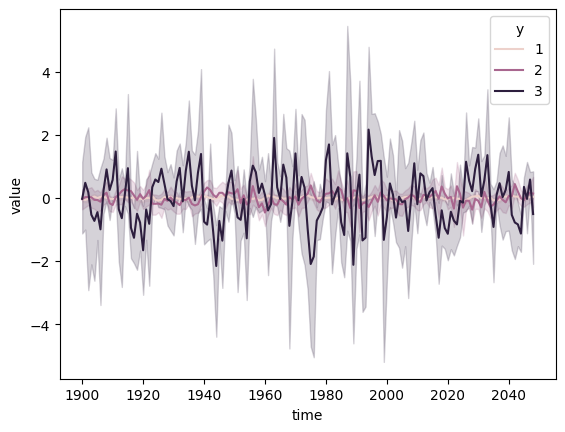

In [15]:
a = d[d.region == 'E1A']
a = a[a.time.between(1900,2049)]
sns.lineplot(data=a, x='time', y='value', hue='y')

In [14]:
df_train['when_dt'] = pd.to_datetime(df_train.when)
df_train.sort_values(by='when_dt', inplace=True)

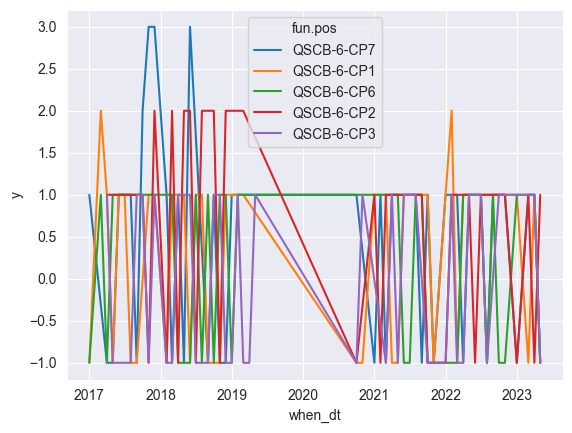

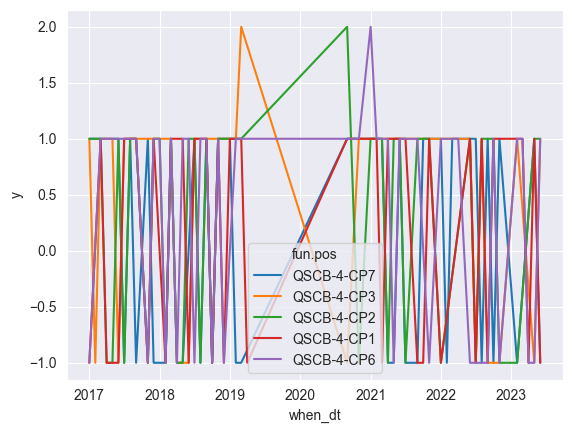

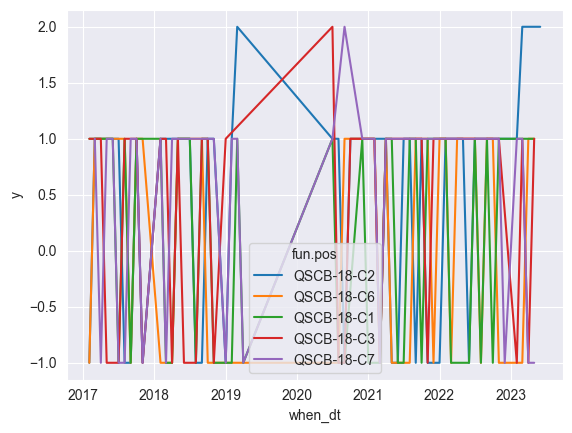

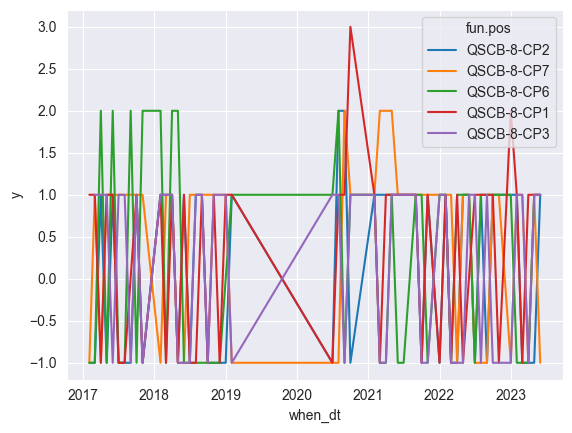

In [44]:
d= pd.concat([df_train, df_test])

d['when_dt'] = pd.to_datetime(d.when)
d.sort_values(by='when_dt', inplace=True)
for main in d['main.pos'].unique():
    sns.set_style('darkgrid')
    sns.lineplot(data=d[d['main.pos']==main],
             x= 'when_dt',
             y='y',
             hue='fun.pos')
    plt.show()

In [16]:
df_test = pd.read_csv('data\\test.csv')

In [18]:
df_test['y'] = -1

In [37]:
a=pd.concat([df_train, df_test]).value_counts(['main.pos', 'fun.pos', 'when'])
a.shape

(1018,)

In [40]:
a = pd.concat([df_train, df_test]).value_counts(['when'])
a[a==20]

a.shape

(65,)

# Fourier analysis

In [85]:
from util import FourierTransformer

ts = df_ts.iloc[1,:2048].values
ts

array([0.97069377, 1.52499104, 1.81334114, ..., 0.75365305, 0.95624411,
       1.11837626])

Visualize Fourier Approximation

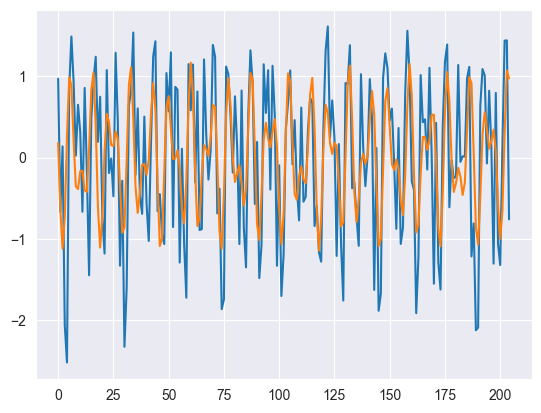

In [105]:
plt.plot(ts[::10])
fa, topk = FourierTransformer.fourier_approximate(ts, 4)
plt.plot(fa[::10])

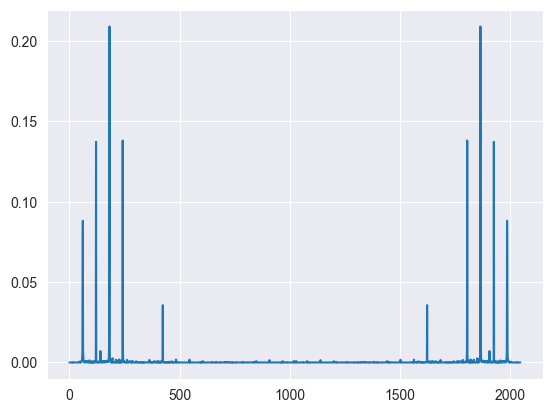

In [96]:
m = FourierTransformer.fourier_magnitude(ts, 0)
plt.plot(m)

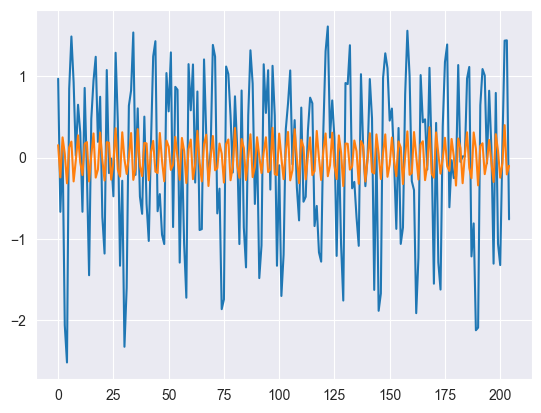

In [106]:
plt.plot(ts[::10])
fa, topk = FourierTransformer.fourier_approximate(ts, list(range(100)))
plt.plot(fa[::10])

In [97]:
topk

array([1866,  182,  242, 1987, 1927,   61,  121, 1867, 1806,  181],
      dtype=int64)